# Top 100 Canadian beers

- Vrbic, Zanini, Reiner


In [1]:
## Initialize dataset
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import pearsonr
from summarytools import dfSummary

beers = pd.read_csv('canadian_beers.csv')

beers.head()

,Unnamed: 0,rank,name,brewery,style,abv,score,ratings
0,0,1,Péché Mortel,Brasserie Dieu du Ciel!,American Double / Imperial Stout,9.5,4.39,5087
1,1,2,Péché Mortel En Fût De Bourbon Américain,Brasserie Dieu du Ciel!,American Double / Imperial Stout,9.5,4.45,488
2,2,3,La Fin Du Monde,Unibroue,Tripel,9.0,4.31,10021
3,3,4,Unibroue 17 Grande Réserve,Unibroue,Belgian Strong Dark Ale,10.0,4.24,1140
4,4,5,Fat Tug IPA,Driftwood Brewery,American IPA,7.0,4.25,601


## Aus welchen Beobachtungen setzen sich die Daten zusammen? Beschreiben Sie diese kurz und überlegen Sie sich, welches Skalenniveau die einzelnen Beobachtungen haben. [2]

### Dieses Dataset besteht aus einer Liste der Top 100 kanadischen Biere:

- Rank: rank, from 1 to 100, as rated by BeerAdvocate.com users (Integer 0 -100)
- Name: name of the beer (String)
- Brewery: the brewery responsible for this delicious creation (String)
- Style: the style of the beer (String)
- ABV: Alcohol by Volume (Float, %, 0% - 15%)
- Score: Overall score determined by BeerAdvocate.com users (Integer 1 - 5)
- Ratings: Number of ratings (Integer 0 - 11000)

Die Beobachtungen und Skalenniveau (->), die den Datensatz zusammensetzen, sind durch die folgende Variable definiert:
| Variablen  |      Beschreibung                                            | Skalenniveau | Erklärung    |
|------------|--------------------------------------------------------------|------------ |--------------|
| rank    | Rang (1 bis 100) bewertet von Benutzern:innen von BeerAdvocate.com |ordinale  | natürlicher Ordnung aber Abstände sind nicht sinnvoll
| name    | Name des Biers |   nominale | können nicht sinnvoll geordnet werden
| brewery | die Brauerei   |   nominale | können nicht sinnvoll geordnet werden
| style   | der Stil des Biers  |   nominale | können nicht sinnvoll geordnet werden
| abv     | Alkoholgehalt pro Volumen (%) |   metrische | indiziert den Alkoholgehalt in Volumenprozent
| score   | allgemeine Wert, den Benutzer:innen von BeerAdvocate.com definieren | ordinale | natürlicher Ordnung aber die Abstände sind nicht sinnvoll
| ratings  | stehen für die Anzahl der Bewertungen | metrische | sinnvolle Abstände


- nominale/kategorische Daten: können nicht sinnvoll geordnet werden (z.B., Haarfarbe, Beruf...)
- ordinale Daten: Daten mit natürlicher Ordnung, aber Abstände sind nicht sinnvoll (z.B., Noten, Offiziersrang, Gefahrenstufe...)
- metrische Daten: Daten mit natürlicher Ordnung und Abstände zwischen Ausprägungen sind sinnvoll (z.B., Größe, Alter, Preis...)


In [2]:
beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   rank        100 non-null    int64  
 2   name        100 non-null    object 
 3   brewery     100 non-null    object 
 4   style       100 non-null    object 
 5   abv         100 non-null    float64
 6   score       100 non-null    float64
 7   ratings     100 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 6.4+ KB


In [3]:
beers.describe()

,Unnamed: 0,rank,abv,score,ratings
count,100.000000,100.000000,100.000000,100.00000,100.000000
mean,49.500000,50.500000,8.272000,4.14300,513.600000
std,29.011492,29.011492,1.931613,0.11055,1312.088935
min,0.000000,1.000000,4.400000,3.91000,50.000000
25%,24.750000,25.750000,6.575000,4.06750,91.500000
50%,49.500000,50.500000,8.550000,4.14000,135.500000
75%,74.250000,75.250000,10.000000,4.20250,271.000000
max,99.000000,100.000000,12.200000,4.48000,10021.000000


In [4]:
beers.shape

(100, 8)

In [5]:
beers.head(10)

,Unnamed: 0,rank,name,brewery,style,abv,score,ratings
0,0,1,Péché Mortel,Brasserie Dieu du Ciel!,American Double / Imperial Stout,9.5,4.39,5087
1,1,2,Péché Mortel En Fût De Bourbon Américain,Brasserie Dieu du Ciel!,American Double / Imperial Stout,9.5,4.45,488
2,2,3,La Fin Du Monde,Unibroue,Tripel,9.0,4.31,10021
3,3,4,Unibroue 17 Grande Réserve,Unibroue,Belgian Strong Dark Ale,10.0,4.24,1140
4,4,5,Fat Tug IPA,Driftwood Brewery,American IPA,7.0,4.25,601
5,5,6,Red Racer IPA (India Pale Ale),Central City Brewers + Distillers,American IPA,6.5,4.23,1085
6,6,7,Nectarous,Four Winds Brewing Co.,American Wild Ale,5.5,4.48,92
7,7,8,Trois Pistoles,Unibroue,Belgian Strong Dark Ale,9.0,4.20,4938
8,8,9,Grande Cuvée Porter Baltique,Les Trois Mousquetaires,Baltic Porter,10.0,4.25,451
9,9,10,Solstice D'été Aux Framboises,Brasserie Dieu du Ciel!,Berliner Weissbier,5.9,4.26,350


In [6]:
rmax = beers['rank'].max()
abvmax = beers['abv'].max()
smax = beers['score'].max()
ramax = beers['ratings'].max()
print(f" rank: {rmax}\n abv: {abvmax}\n score: {smax}\n ratings: {ramax}")

 rank: 100
 abv: 12.2
 score: 4.48
 ratings: 10021


Wie setzen sich die einzelnen Beobachtungen zusammen? Verwenden Sie Methoden für univariate Datensätze sinnvoll. [3]

- Deskriptive Statistik: Berechnung von Durchschnitt, Median, Modus, Minima, Maxima und Standardabweichungen
- Visualisierungen: Histogram, Boxplot, Violinplot
- Häufigkeitsverteilungen: Erstellen von Häufigkeitstabellen und Balkendiagrammen/Histogram 
  

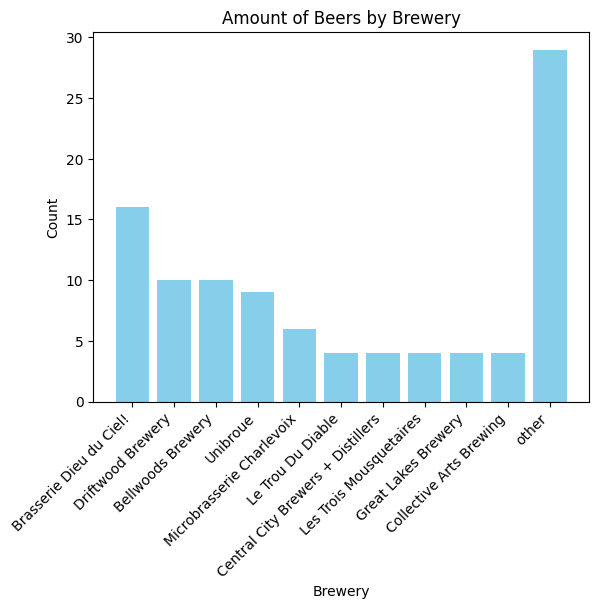

In [7]:
brewery_count_elements = beers['brewery'].value_counts()

# Combine breweries with less than 4 counts into 'other'
brewery_count_elements['other'] = brewery_count_elements[brewery_count_elements < 4].sum()
brewery_count_elements = brewery_count_elements[brewery_count_elements >= 4]

# Create a bar chart for brewery
plt.bar(brewery_count_elements.index, brewery_count_elements.values, color='skyblue')

plt.xlabel('Brewery')
plt.ylabel('Count')
plt.title('Amount of Beers by Brewery')

# Rotate x-axis 
plt.xticks(rotation=45, ha='right')

plt.show()

In [8]:
dfSummary(beers, is_collapsible=True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Unnamed: 0[int64],Mean (sd) : 49.5 (29.0)min < med < max:0.0 < 49.5 < 99.0IQR (CV) : 49.5 (1.7),100 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,rank[int64],Mean (sd) : 50.5 (29.0)min < med < max:1.0 < 50.5 < 100.0IQR (CV) : 49.5 (1.7),100 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
3,name[object],1. Péché Mortel2. Eau Benite3. La Buteuse4. Play Dead IPA5. Bounty Hunter6. La Fringante7. Olde Deuteronomy8. Immoralité9. Boogie Monster10. Saison Du Tracteur11. other,1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)1 (1.0%)90 (90.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADpElEQVR4nO3cQWobWRhG0V/CJNGkhDB4GV6AF9GL7UVoAd6HMa5BlGSiDAKhhx07vgrKOXNDDS5PVPE+b87n80Bhe+kH4O8hNjJiIyM2MmIjIzYyYiMjNjJiI7OZmd3MfJiZb+fz+XTh5+GK3dze3v6zLMthXdfnzWbzr+B4L9tlWQ739/ezLMthfpxw8C62MzO73e7rpR+E6+cFgYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyGxnZk6n08dLPwjXb7uu6/Pj4+Os6/o8M98u/UBcLxsEMhv/MouKk42MdRUZ6yoy1lVkfNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjGvhZAxeyDjZyBi8kDF4IWPwQsZHXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsi4Fk7G4IWMFwQyfkbJWFeRsa4iY11FxgsCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZFwLJ2NdRcbJRsbghYzBCxmDFzI+6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGtXAyBi9knGxkDF7IGLyQMXgh46MuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxgaBjHUVGScbGesqMtZVZKyryPioS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxnXwskYvJBxspExeCFj8ELG4IWMj7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcS2cjMELGS8IZPyMkrGuImNdRca6iowXBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8i4Fk7GuoqMk42MwQsZgxcyBi9kfNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjGvhZAxeyPz3ZIP/49W/gD8HL7/7ibhObxlG3SzLcnh4eDjt9/sv7/FwXI+Xl5dPx+Px8PT09GFmfj22mZn9fv/l7u7u829/Oq7R7rV/6KMuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbmZuZH1dHLv0g/Pne2snNuq7Px+PxMG+4OsLf4y3DKNfC+VWvvhZu8ELGCwIZsZERGxmxkREbGbGRERsZsZERG5nvdJK3xX4jWJ4AAAAASUVORK5CYII="">",0(0.0%)
4,brewery[object],1. Brasserie Dieu du Ciel!2. Driftwood Brewery3. Bellwoods Brewery4. Unibroue5. Microbrasserie Charlevoix6. Le Trou Du Diable7. Central City Brewers + Distill8. Les Trois Mousquetaires9. Great Lakes Brewery10. Collec

## Ermitteln Sie Kennzahlen für die einzelnen Beobachtungen, die Ihnen sinnvoll erscheinen. (Lokation, Modus, Varianzen, Quantile…) [2]

- Quantile: Quartile, Perzentile
- Lokationsmaße: Mittelwert, Median
- Modus: Für kategoriale Variablen
- Varianz und Standardabweichung: Varianz, Standardabweichung


In [9]:
## Ermitteln Sie die 3 häufigsten Brauereien und Bier Arten, die in diesem Datensatz vorkommen.

top3breweries = beers.groupby(['brewery']).size().sort_values(ascending=False).head(3).index
top3styles = beers.groupby(['style']).size().sort_values(ascending=False).head(3).index

print(f"Brauereien:\n", top3breweries, "\n\nArten:\n", top3styles)


Brauereien:
 Index(['Brasserie Dieu du Ciel!', 'Bellwoods Brewery', 'Driftwood Brewery'], dtype='object', name='brewery') 

Arten:
 Index(['American IPA', 'American Double / Imperial IPA',
       'Russian Imperial Stout'],
      dtype='object', name='style')


In [10]:
### Wie verteilen sich Rang und Score auf diese Brauereien und Arten von Bier?

rows_breweries = beers.loc[beers['brewery'].isin(top3breweries)]
rows_breweries.groupby('brewery')[['rank', 'score']].describe()

# Bellwoods Brewery

rank                                                \
                        count     mean        std   min    25%   50%    75%   
brewery                                                                       
Bellwoods Brewery        10.0  49.4000  17.011107  17.0  37.75  51.5  60.25   
Brasserie Dieu du Ciel!  16.0  48.1875  35.427332   1.0  11.75  49.5  76.00   
Driftwood Brewery        10.0  46.6000  30.015552   5.0  26.00  37.5  73.25   

                               score                                           \
                           max count      mean       std   min     25%    50%   
brewery                                                                         
Bellwoods Brewery         72.0  10.0  4.196000  0.077488  4.10  4.1400  4.200   
Brasserie Dieu du Ciel!  100.0  16.0  4.140625  0.157076  3.91  4.0275  4.115   
Driftwood Brewery         89.0  10.0  4.188000  0.116123  4.01  4.0975  4.200   

                                       
                            75%   max  
brewery                                
Bellwoods Brewery        4.2250  4.34  
Brasserie Dieu du Ciel!  4.2450  4.45  
Driftwood Brewery        4.2575  4.36

/home/wreiner/tmp/_sem3-swd22/visdatam/.venv/jupytervis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wreiner/tmp/_sem3-swd22/visdatam/.venv/jupytervis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wreiner/tmp/_sem3-swd22/visdatam/.venv/jupytervis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wreiner/tmp/_sem3-swd22/visdatam/.venv/jupytervis/lib/python3.11/site-packages/seaborn/_ol

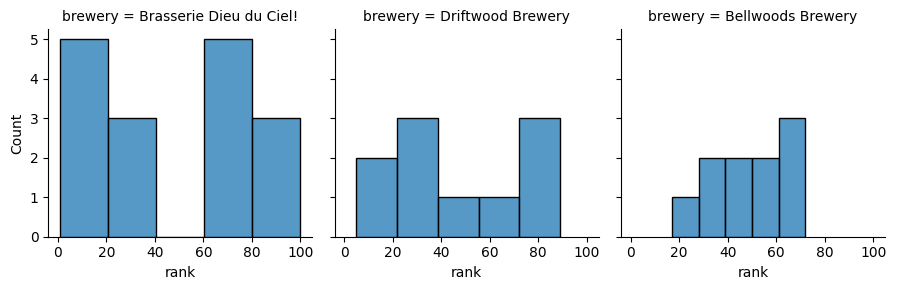

In [11]:
g = sns.FacetGrid(rows_breweries, col='brewery')
g.map(sns.histplot, 'rank')
sns.set_style('darkgrid')
g.add_legend()

In [12]:
rows_styles = beers.loc[beers['style'].isin(top3styles)]
rows_styles.groupby('style')[['rank', 'score']].describe()

# American IPA

rank                                           \
                               count       mean        std   min    25%   50%   
style                                                                           
American Double / Imperial IPA  13.0  63.076923  20.710149  27.0  51.00  66.0   
American IPA                    18.0  43.222222  29.997168   5.0  19.50  41.0   
Russian Imperial Stout          10.0  47.700000  30.262004  17.0  25.25  41.0   

                                            score                            \
                                  75%   max count      mean       std   min   
style                                                                         
American Double / Imperial IPA  76.00  95.0  13.0  4.116923  0.061831  4.01   
American IPA                    69.25  90.0  18.0  4.176111  0.111310  3.95   
Russian Imperial Stout          57.50  99.0  10.0  4.169000  0.120227  3.98   

                                                            
                                  25%    50%     75%   max  
style                                                       
American Double / Imperial IPA  4.070  4.120  4.1600  4.24  
American IPA                    4.110  4.180  4.2575  4.36  
Russian Imperial Stout          4.065  4.205  4.2250  4.34

/home/wreiner/tmp/_sem3-swd22/visdatam/.venv/jupytervis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wreiner/tmp/_sem3-swd22/visdatam/.venv/jupytervis/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wreiner/tmp/_sem3-swd22/visdatam/.venv/jupytervis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wreiner/tmp/_sem3-swd22/visdatam/.venv/jupytervis/lib/python3.11/site-packages/seaborn/_ol

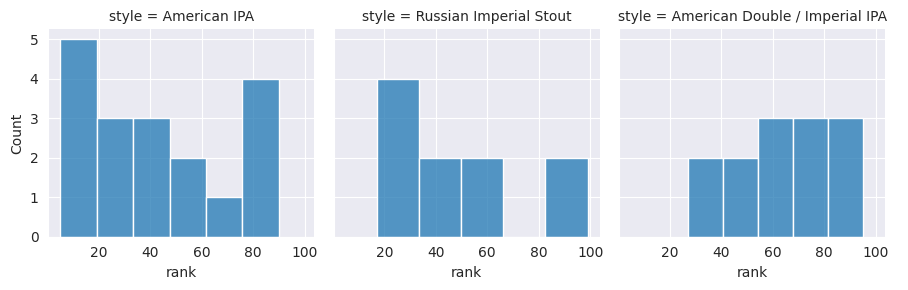

In [13]:
g = sns.FacetGrid(rows_styles, col='style')
g.map(sns.histplot, 'rank')
sns.set_style('darkgrid')
g.add_legend()

### Das Bier welcher Brauerei und welcher Art würden Sie jemandem empfehlen, wenn Sie sich nach dem Score richten? (Betrachten Sie hier nur die 3 häufigsten Arten) [3]

- Brauerei: Bellwoods Brewery (bei höchster mean Wert) oder Driftwood Brewery (höchster Score)
- Art: American IPA (höchster mean Wert)

In [14]:
## Fügen Sie eine Variable ein, die anzeigt, ob es sich um ein american style beer handelt (Tipp: beerstyle). Wie siehen scores und rank in diesem Fall aus? [3]
def is_american_style(row):
    if row['style'].lower().find('american') == 0:
        return "Yes"
    return "No"

beers["american"] = beers.apply(is_american_style, axis=1)

beers.tail()

,Unnamed: 0,rank,name,brewery,style,abv,score,ratings,american
95,95,96,Red Racer Gingerhead Gingerbread Stout,Central City Brewers + Distillers,Irish Dry Stout,6.0,4.04,84,No
96,96,97,Solstice D'hiver,Brasserie Dieu du Ciel!,American Barleywine,10.2,3.91,921,Yes
97,97,98,"Long, Dark Voyage To Uranus",Sawdust City Brewing Co.,Russian Imperial Stout,8.5,4.04,83,No
98,98,99,Amsterdam Tempest Imperial Stout,Amsterdam Brewing Company,Russian Imperial Stout,9.0,3.98,138,No
99,99,100,Rigor Mortis Abt,Brasserie Dieu du Ciel!,Quadrupel (Quad),10.5,3.91,759,No


## Untersuchen Sie die Unterschiede zwischen ‘Ale’ und ‘Stout’ Bieren. [5]

- Stout hat höheren Alkoholgehalt
    - Ale ist von 4,5 bis 6,5 %
    - Stout von 4,5 bis 8 %.
- Score ist ziemlich gleich
- Rating ist ziemlich gleich
- Laut Dataset haben beide Bierstyles eine hohe Qualität und gute Ratings

/home/wreiner/tmp/_sem3-swd22/visdatam/.venv/jupytervis/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/home/wreiner/tmp/_sem3-swd22/visdatam/.venv/jupytervis/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


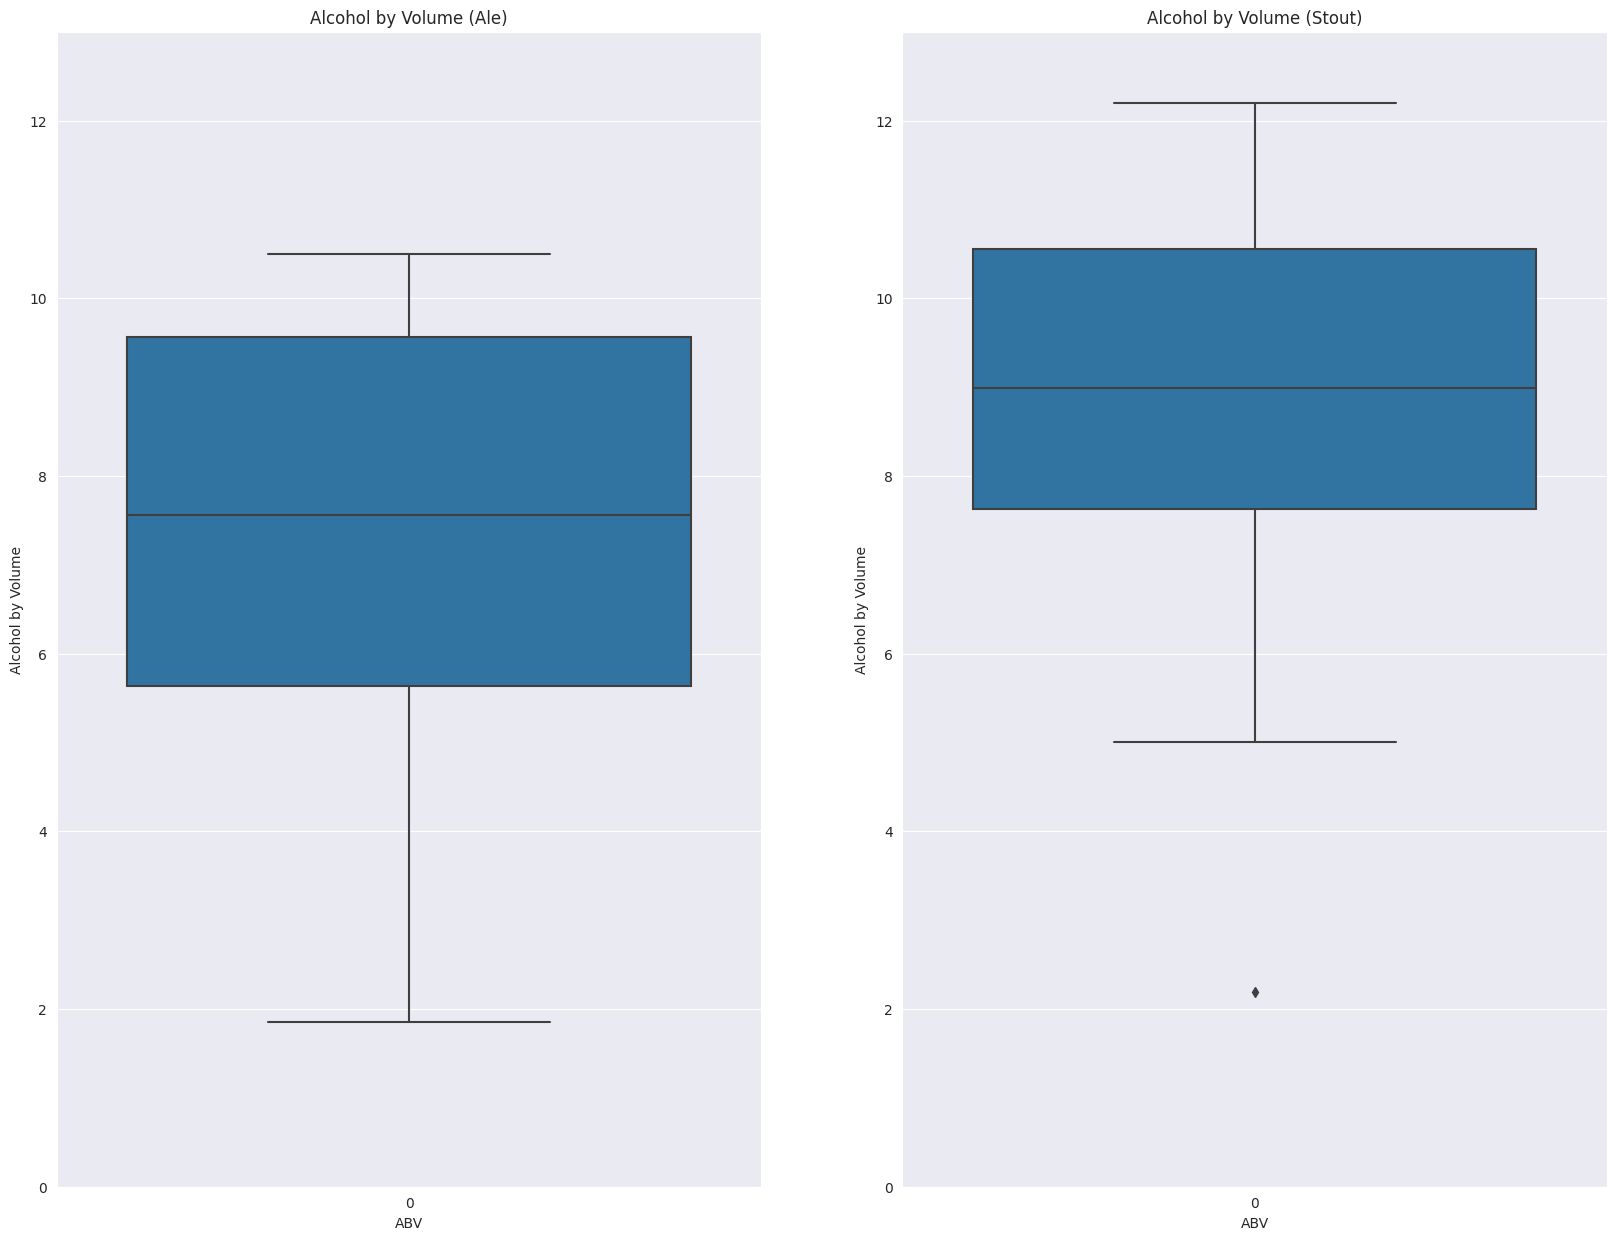

In [15]:

# Ale
# ale_statsis = beers[beers['style'].str.contains('ale', case=False)].describe()
# ale_statsis.plot.bar()

# beers[beers['style'].str.contains('ale', case=False)]['abv'].describe(include='all').plot.box()

# ale_abv = beers[beers['style'].str.contains('ale', case=False)]['abv'].describe(include='all').loc['mean']
# ale_score = beers[beers['style'].str.contains('ale', case=False)]['score'].describe(include='all').loc['mean']

### ABV

fig, ax = plt.subplots(1,2, figsize=(20,15))
ax.flatten()

ale_a = beers[beers['style'].str.contains('ale', case=False)]['abv'].describe(include='all')
sns.boxplot(data=ale_a, ax=ax[0])
ax[0].set_xlabel("ABV")
ax[0].set_ylabel("Alcohol by Volume")
ax[0].set_title("Alcohol by Volume (Ale)")
ax[0].set_ylim([0, 13])

stout_a = beers[beers['style'].str.contains('stout', case=False)]['abv'].describe(include='all')
sns.boxplot(data=stout_a, ax=ax[1])
ax[1].set_xlabel("ABV")
ax[1].set_ylabel("Alcohol by Volume")
ax[1].set_title("Alcohol by Volume (Stout)")
ax[1].set_ylim([0, 13])

plt.show()


/home/wreiner/tmp/_sem3-swd22/visdatam/.venv/jupytervis/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/home/wreiner/tmp/_sem3-swd22/visdatam/.venv/jupytervis/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


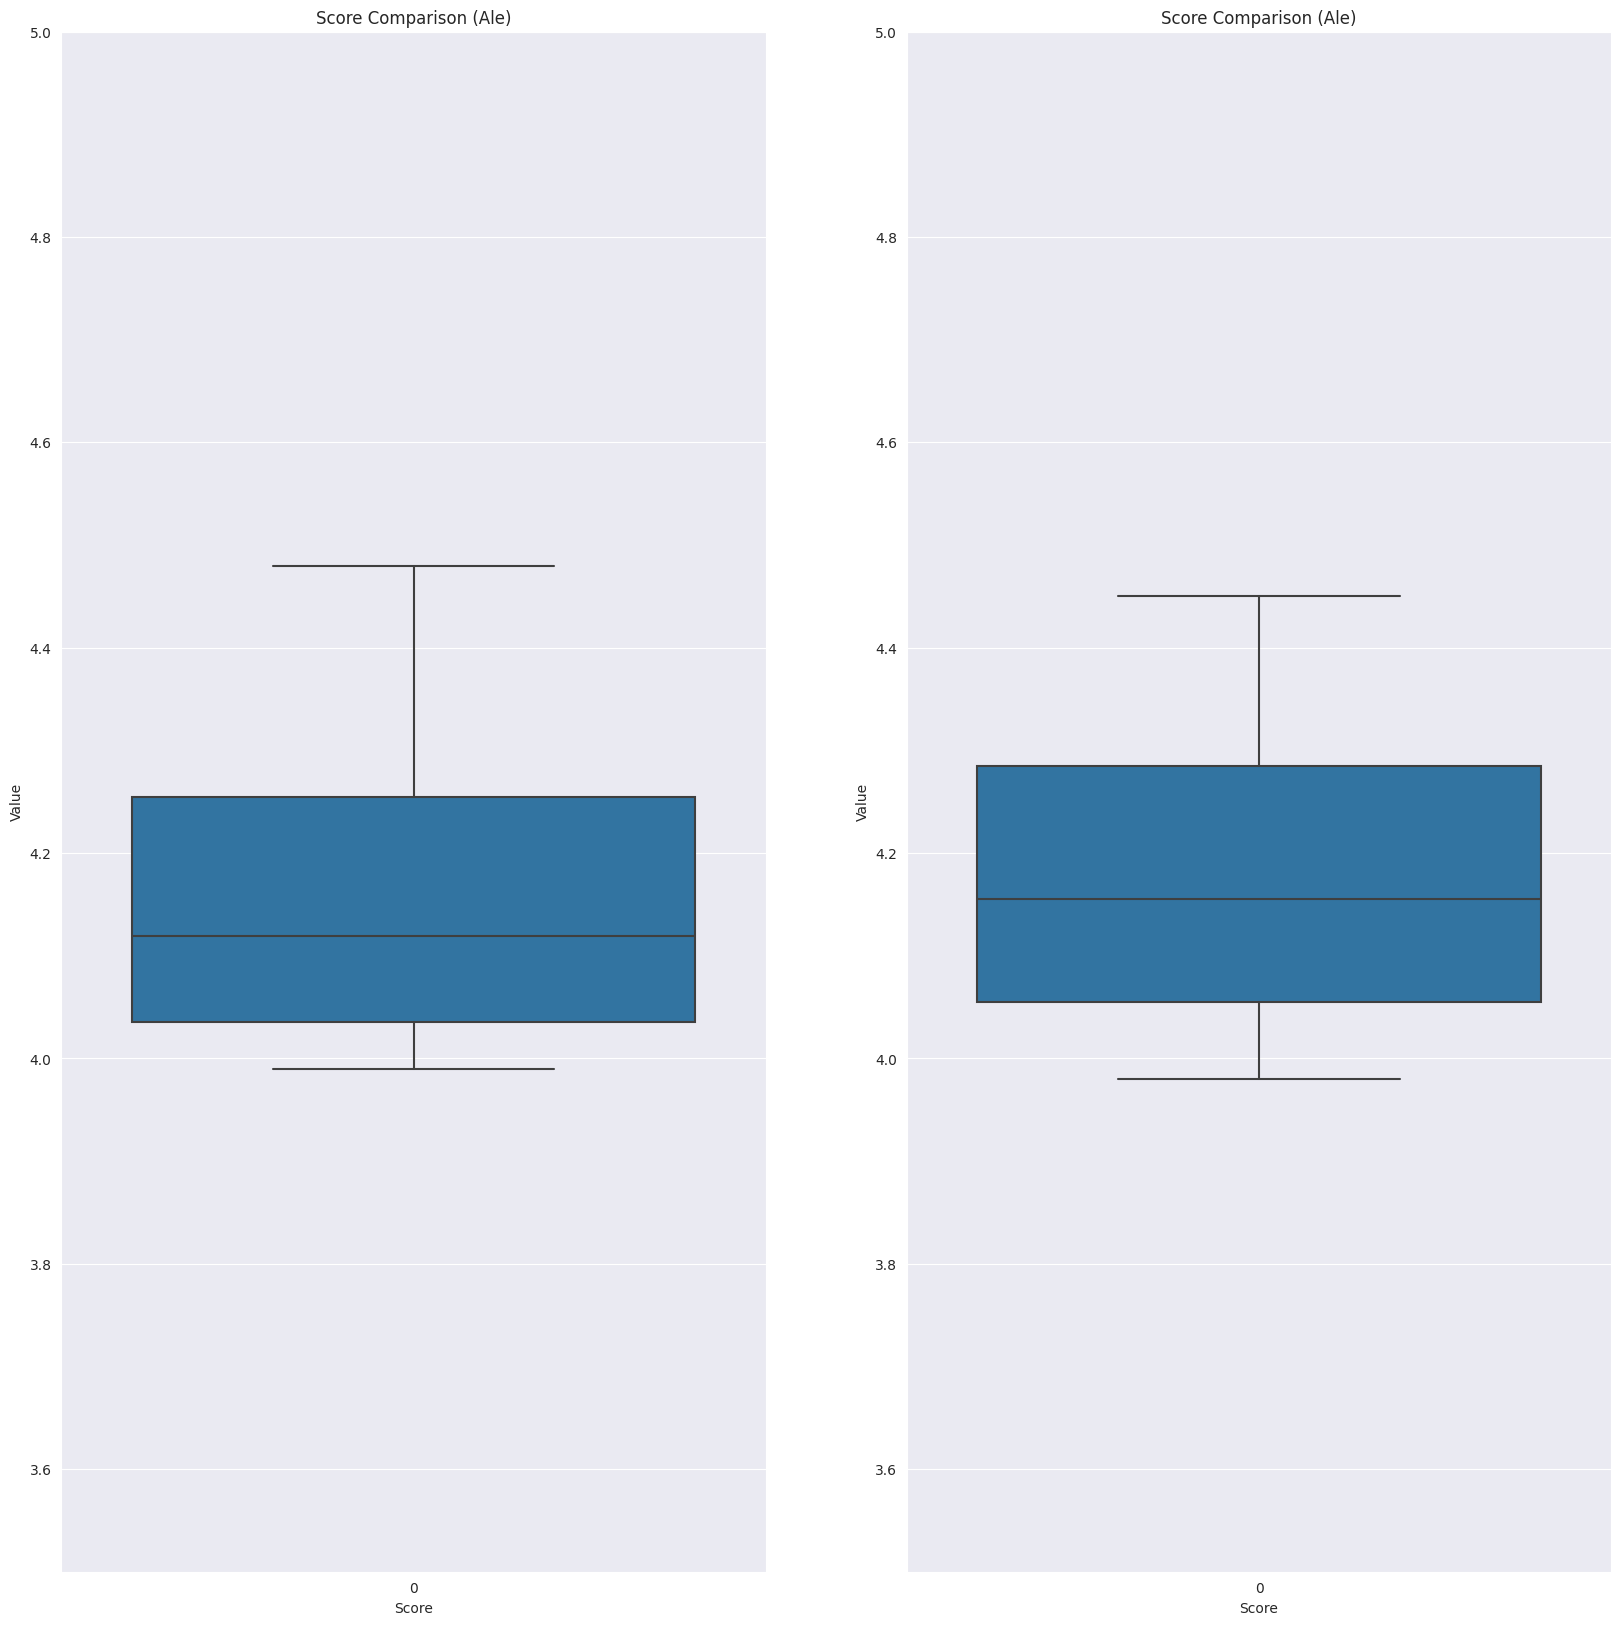

In [16]:
### Score

fig, ax = plt.subplots(1,2, figsize=(20,20))
ax.flatten()

ale_s = beers[beers['style'].str.contains('ale', case=False)]['score'].describe(include='all')
sns.boxplot(data=ale_s, ax=ax[0])
ax[0].set_xlabel("Score")
ax[0].set_ylabel("Value")
ax[0].set_title("Score Comparison (Ale)")
ax[0].set_ylim([3.5, 5])

stout_s = beers[beers['style'].str.contains('stout', case=False)]['score'].describe(include='all')
sns.boxplot(data=stout_s, ax=ax[1])
ax[1].set_xlabel("Score")
ax[1].set_ylabel("Value")
ax[1].set_title("Score Comparison (Ale)")
ax[1].set_ylim([3.5, 5])

plt.show()

# Stout

# beers[beers['style'].str.contains('stout', case=False)].describe()

# beers[beers['style'].str.contains('stout', case=False)]['abv'].describe(include='all').plot.box()

# stout_abv = beers[beers['style'].str.contains('stout', case=False)]['abv'].describe(include='all').loc['mean']
# stout_score = beers[beers['style'].str.contains('stout', case=False)]['score'].describe(include='all').loc['mean']

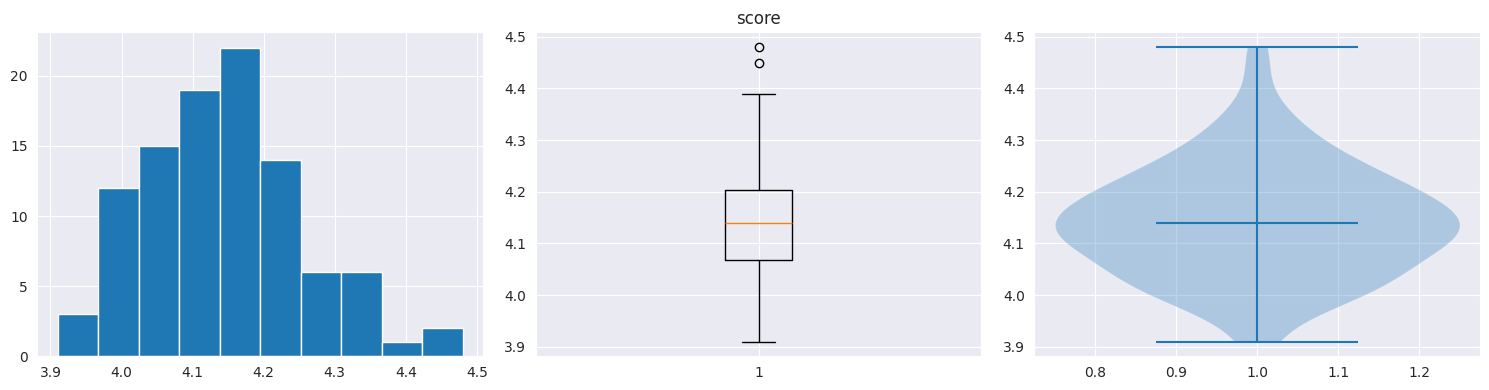

In [17]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))

ax[0].hist(beers["score"])

ax[1].boxplot(beers["score"].dropna())
ax[1].set_title("score")

ax[2].violinplot(beers["score"].dropna(), showmedians=True)

fig.tight_layout()

plt.show()

/home/wreiner/tmp/_sem3-swd22/visdatam/.venv/jupytervis/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/home/wreiner/tmp/_sem3-swd22/visdatam/.venv/jupytervis/lib/python3.11/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


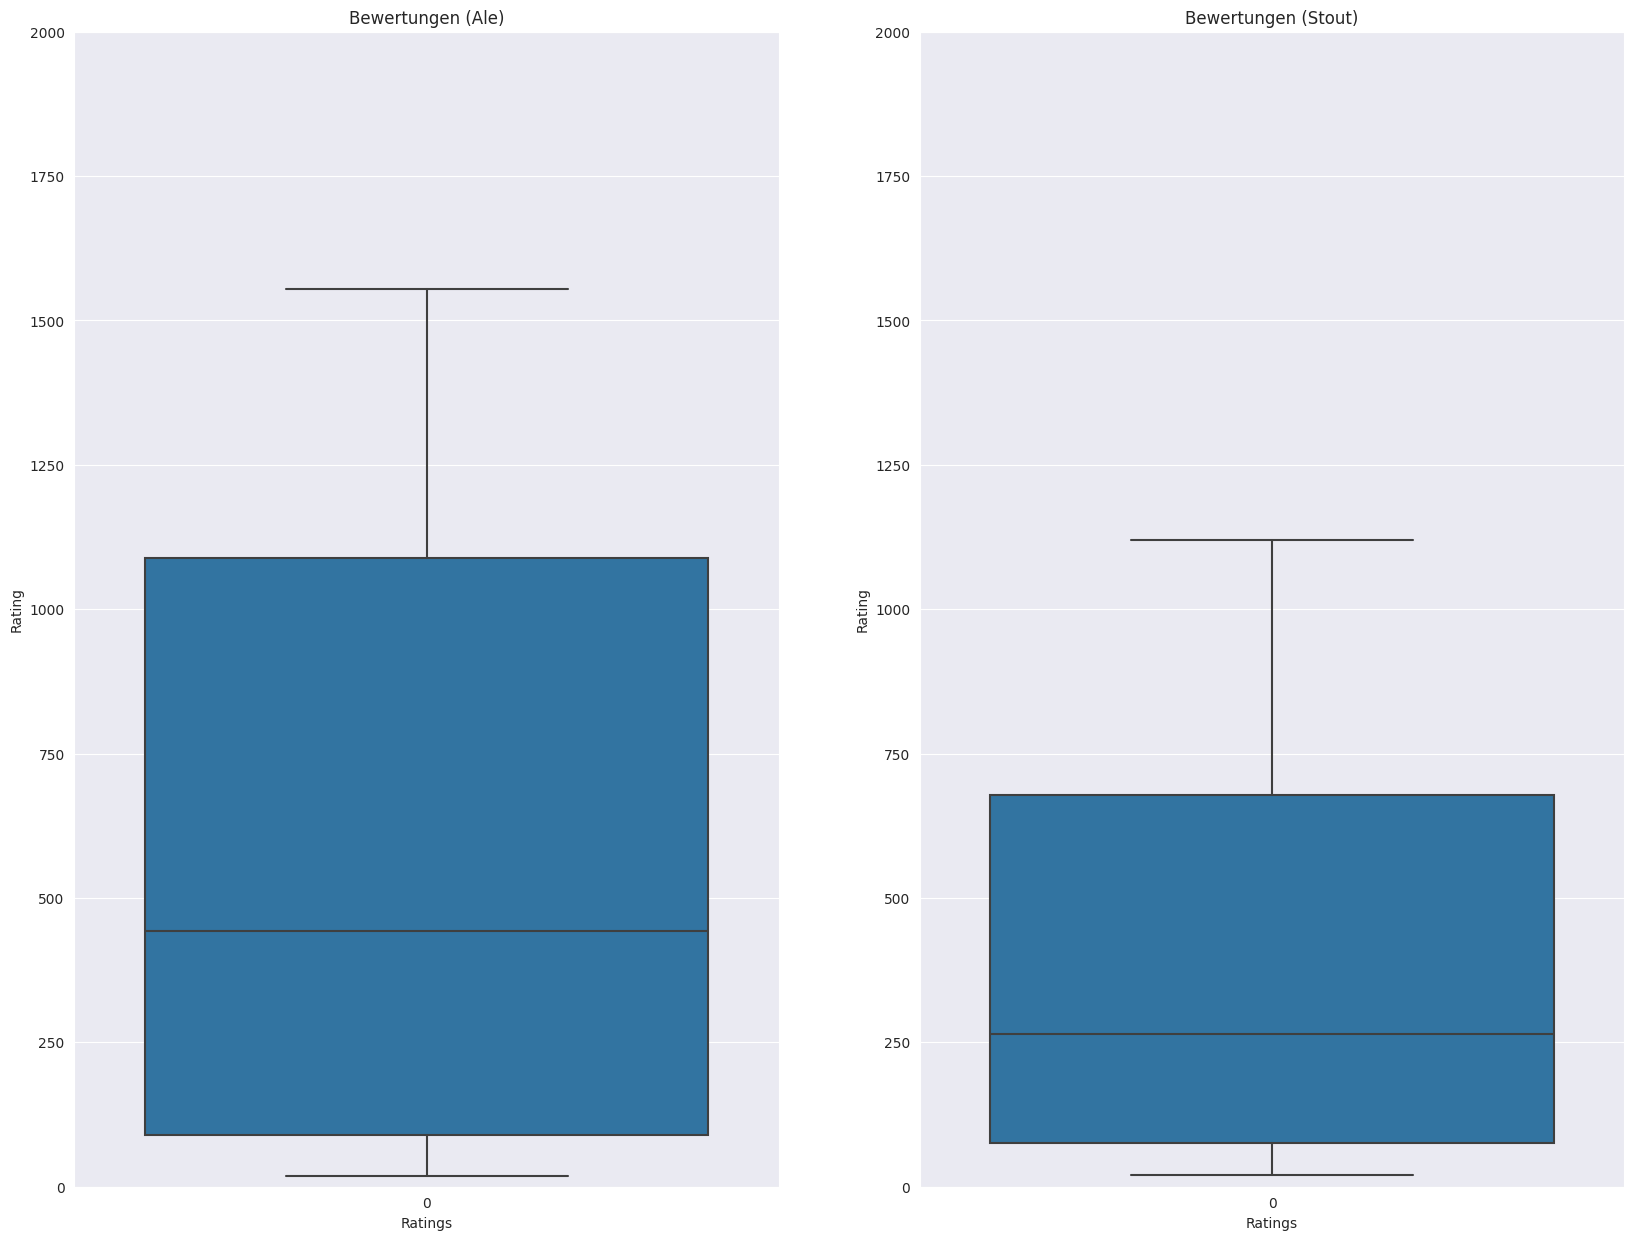

In [18]:
### Rating

fig, ax = plt.subplots(1,2, figsize=(20,15))
ax.flatten()

ale_r = beers[beers['style'].str.contains('ale', case=False)]['ratings'].describe(include='all')
sns.boxplot(data=ale_r, ax=ax[0])
ax[0].set_xlabel("Ratings")
ax[0].set_ylabel("Rating")
ax[0].set_title("Bewertungen (Ale)")
ax[0].set_ylim([0, 2000])

stout_r = beers[beers['style'].str.contains('stout', case=False)]['ratings'].describe(include='all')
sns.boxplot(data=stout_r, ax=ax[1])
ax[1].set_xlabel("Ratings")
ax[1].set_ylabel("Rating")
ax[1].set_title("Bewertungen (Stout)")
ax[1].set_ylim([0, 2000])

plt.show()

### Korrelationskoeffizient

- Ergebnisse zeigen, dass es eine mäßige negative Korrelation zwischen dem Ranking und dem Alkoholgehalt (-0,125238) und eine starke negative Korrelation zwischen dem Ranking und der Bewertung (-0,748251) gibt.
- Das bedeutet das Biere mit einem höheren Alkoholgehalt und einer höheren Bewertung tendenziell eine niedrigere Platzierung haben.
- Das ist auch bestätigt mit Pearson-Korrelationskoeffizienten. Es besteht eine Beziehung zwischen den drei Variablen, aber es ist nicht linear. Kurz gesagt es wird bei
Bewertung nur nicht auf Alkoholgehalt und Score geschaut, sondern auf andere Variablen.

In [19]:
all_abv_pr = pearsonr(beers['rank'], beers['abv'])
print("R_abv_all: " + str(all_abv_pr[0]))

R_abv_all: -0.12523753746670946


In [20]:
all_score_pr = pearsonr(beers['rank'], beers['score'])
print("R_score_all: " + str(all_score_pr[0]))

R_score_all: -0.7482512972721579


In [21]:
## Untersuchen Sie den Score in Abhängigkeit der anderen Variablen. Welche Variablen haben Ihrer Meinung nach einen Einfluss?

In [22]:
beers[["rank", "abv", "score", "ratings"]].corr(numeric_only=False)

,rank,abv,score,ratings
rank,1.000000,-0.125238,-0.748251,-0.385181
abv,-0.125238,1.000000,0.113120,0.071353
score,-0.748251,0.113120,1.000000,0.209670
ratings,-0.385181,0.071353,0.209670,1.000000


- Die Korrelationsmatrix zeigt die Korrelation zwischen den vier Variablen "Rang", "Alkoholgehalt", "Punktzahl" und "Bewertungen".
- Die Korrelation zwischen "Rang" und "Alkoholgehalt" beträgt -0,125238, was eine schwache negative Korrelation ist. Das bedeutet, dass es eine leichte negative Beziehung zwischen den beiden Variablen gibt. Biere mit einem höheren Alkoholgehalt tendieren dazu, eine niedrigere Platzierung zu haben.
- Die Korrelation zwischen "Rang" und "Punktzahl" beträgt -0,748251, was eine starke negative Korrelation ist. Das bedeutet, dass es eine starke negative Beziehung zwischen den beiden Variablen gibt. Biere mit einer höheren Punktzahl tendieren dazu, eine niedrigere Platzierung zu haben.
- Die Korrelation zwischen "Rang" und "Bewertungen" beträgt -0,385181, was eine moderate negative Korrelation ist. Das bedeutet, dass es eine moderate negative Beziehung zwischen den beiden Variablen gibt. Biere mit einer höheren Bewertung tendieren dazu, eine niedrigere Platzierung zu haben.
- Die Korrelation zwischen "Alkoholgehalt" und "Punktzahl" beträgt 0,113120, was eine sehr schwache positive Korrelation ist. Das bedeutet, dass es eine leichte positive Beziehung zwischen den beiden Variablen gibt. Biere mit einem höheren Alkoholgehalt tendieren dazu, eine etwas höhere Punktzahl zu haben.
- Die Korrelation zwischen "Alkoholgehalt" und "Bewertungen" beträgt 0,071353, was eine sehr schwache positive Korrelation ist. Das bedeutet, dass es eine leichte positive Beziehung zwischen den beiden Variablen gibt. Biere mit einem höheren Alkoholgehalt tendieren dazu, eine etwas höhere Bewertung zu haben.
- Die Korrelation zwischen "Punktzahl" und "Bewertungen" beträgt 0,209670, was eine moderate positive Korrelation ist. Das bedeutet, dass es eine moderate positive Beziehung zwischen den beiden Variablen gibt. Biere mit einer höheren Punktzahl tendieren dazu, eine etwas höhere Bewertung zu haben.
- Generell sind die Korrelationen zwischen den vier Variablen schwach bis moderat. Das bedeutet, dass es eine Beziehung zwischen den Variablen gibt, aber sie ist nicht stark.